In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import csv
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [3]:
data_dir = "/data/ddmg/redditlanguagemodeling/data/AmazonReviews/data"

## Examine Majority Class Baseline for Wilds User Split Dataset

In [4]:
data_df = pd.read_csv(os.path.join(data_dir, 'amazon_v2.0/reviews.csv'),
                      dtype={'reviewerID':str, 'asin':str, 'reviewTime':str,'unixReviewTime':int,
                             'reviewText':str,'summary':str,'verified':bool,'category':str, 'reviewYear':int},
                      keep_default_na=False, na_values=[], quoting=csv.QUOTE_NONNUMERIC)

In [5]:
split_df = pd.read_csv(os.path.join(data_dir, 'amazon_v2.0', 'splits', 'user.csv'))

In [6]:
data_df["split"] = split_df["split"]

In [12]:
perf_by_user = data_df.groupby(["split", "reviewerID"]).agg(lambda x: x.value_counts(normalize=True).iloc[0])["overall"]

In [13]:
perf_by_user

split  reviewerID          
-1.0   A0020356UF96ZV361ST     0.626984
       A00463782V7TKAP9EMNL    0.515152
       A00577669P2XCLU956L8    0.774194
       A0061296P44YI9YQBDHH    0.911765
       A0096681Y127OL1H8W3U    0.761905
                                 ...   
 4.0   AY3XPKRAMKKY7           0.760000
       AY5E0O8II03DY           0.480000
       AYQ14XGJODM9J           0.720000
       AYTMXLYK6SC9H           0.560000
       AZK12FBX7X7LN           0.413333
Name: overall, Length: 160810, dtype: float64

In [15]:
perf_by_user.groupby('split').mean()

split
-1.0    0.690044
 0.0    0.647761
 1.0    0.646837
 2.0    0.660405
 3.0    0.635562
 4.0    0.640383
Name: overall, dtype: float64

In [16]:
perf_by_user.groupby('split').std()

split
-1.0    0.197131
 0.0    0.188685
 1.0    0.195444
 2.0    0.193723
 3.0    0.192867
 4.0    0.187439
Name: overall, dtype: float64

In [17]:
perf_by_user.groupby('split').quantile(.1)

split
-1.0    0.424242
 0.0    0.416667
 1.0    0.413333
 2.0    0.413333
 3.0    0.400000
 4.0    0.413333
Name: overall, dtype: float64

In [18]:
perf_by_category = data_df.groupby(["split", "category"]).agg(lambda x: x.value_counts(normalize=True).iloc[0])["overall"]

In [19]:
perf_by_category

split  category                  
-1.0   All_Beauty                    0.782609
       Arts_Crafts_and_Sewing        0.758166
       Automotive                    0.716424
       Books                         0.605437
       CDs_and_Vinyl                 0.681637
                                       ...   
 4.0   Software                      1.000000
       Sports_and_Outdoors           0.578652
       Tools_and_Home_Improvement    0.636076
       Toys_and_Games                0.662651
       Video_Games                   0.631579
Name: overall, Length: 154, dtype: float64

In [23]:
perf_by_category.loc[3, :].mean()

0.594007103696495

In [20]:
# Train Perf
perf_by_category.loc[3, :]

split  category                   
3.0    All_Beauty                     0.444444
       Arts_Crafts_and_Sewing         0.848101
       Automotive                     0.650602
       Books                          0.570146
       CDs_and_Vinyl                  0.589569
       Cell_Phones_and_Accessories    0.701987
       Clothing_Shoes_and_Jewelry     0.585698
       Digital_Music                  0.275862
       Electronics                    0.649740
       Grocery_and_Gourmet_Food       0.614228
       Home_and_Kitchen               0.596139
       Industrial_and_Scientific      0.615385
       Kindle_Store                   0.578947
       Luxury_Beauty                  0.459459
       Movies_and_TV                  0.440032
       Musical_Instruments            0.774194
       Office_Products                0.636230
       Patio_Lawn_and_Garden          0.594203
       Pet_Supplies                   0.567762
       Prime_Pantry                   0.685185
       Software          

In [21]:
category_counts = data_df.groupby(["split", "category"]).count()['overall']

In [22]:
category_counts.loc[0, :]

split  category                   
0.0    All_Beauty                         13
       Arts_Crafts_and_Sewing            193
       Automotive                        320
       Books                          182663
       CDs_and_Vinyl                    1115
       Cell_Phones_and_Accessories       307
       Clothing_Shoes_and_Jewelry       1759
       Digital_Music                      28
       Electronics                      2736
       Grocery_and_Gourmet_Food         1995
       Home_and_Kitchen                 4403
       Industrial_and_Scientific          81
       Kindle_Store                    32281
       Luxury_Beauty                     158
       Magazine_Subscriptions              2
       Movies_and_TV                    9879
       Musical_Instruments                47
       Office_Products                  1298
       Patio_Lawn_and_Garden             709
       Pet_Supplies                     1908
       Prime_Pantry                      367
       Software     

In [10]:
data_df.groupby("split").count()["overall"]

split
-1.0    9577445
 0.0     245502
 1.0     100050
 2.0      46950
 3.0     100050
 4.0      46950
Name: overall, dtype: int64

In [9]:
data_df.groupby("split").agg(lambda x: x.value_counts(normalize=True).iloc[0])["overall"]

split
-1.0    0.627883
 0.0    0.575380
 1.0    0.584988
 2.0    0.595761
 3.0    0.569365
 4.0    0.581278
Name: overall, dtype: float64

## Create Smaller Dataset and Examine Majority Classe Baseline for This

In [24]:
# pick a few categories and pick reviews just from them
include_categories = [
    "Movies_and_TV",
    "Books", # may want to take a subset of these because there are so many
    "Grocery_and_Gourmet_Food",
    "Prime_Pantry"
]

In [25]:
my_df = data_df[data_df["category"].isin(include_categories)]

In [26]:
my_df.groupby("split").count()["overall"]

split
-1.0    5980711
 0.0     194904
 1.0      78038
 2.0      36534
 3.0      77815
 4.0      36790
Name: overall, dtype: int64

In [27]:
my_df.groupby(["split", "category"]).count()["overall"]

split  category                
-1.0   Books                       5116104
       Grocery_and_Gourmet_Food     169953
       Movies_and_TV                667096
       Prime_Pantry                  27558
 0.0   Books                        182663
       Grocery_and_Gourmet_Food       1995
       Movies_and_TV                  9879
       Prime_Pantry                    367
 1.0   Books                         73195
       Grocery_and_Gourmet_Food       1049
       Movies_and_TV                  3628
       Prime_Pantry                    166
 2.0   Books                         34313
       Grocery_and_Gourmet_Food        490
       Movies_and_TV                  1661
       Prime_Pantry                     70
 3.0   Books                         71594
       Grocery_and_Gourmet_Food        998
       Movies_and_TV                  5061
       Prime_Pantry                    162
 4.0   Books                         34601
       Grocery_and_Gourmet_Food        450
       Movies_and_TV  

In [40]:
split_df2 = pd.read_csv(os.path.join(data_dir, 'amazon_v2.0', 'splits', 'category_subpopulation.csv'))

In [41]:
data_df2 = data_df.copy()
data_df2["split"] = split_df2["split"]

In [42]:
my_df2 = data_df2[data_df2["category"].isin(include_categories)]
my_df2.groupby(["split", "category"]).count()["overall"]

split  category                
-1.0   Books                       4963386
       Grocery_and_Gourmet_Food     155626
       Movies_and_TV                619369
       Prime_Pantry                  23720
 0.0   Books                        547084
       Grocery_and_Gourmet_Food      17309
       Movies_and_TV                 67591
       Prime_Pantry                   2707
 1.0   Books                          1000
       Grocery_and_Gourmet_Food       1000
       Movies_and_TV                  1000
       Prime_Pantry                   1000
 2.0   Books                          1000
       Grocery_and_Gourmet_Food       1000
       Movies_and_TV                  1000
       Prime_Pantry                   1000
Name: overall, dtype: int64

In [43]:
# this could be good because fewer for testing!
# but downsample training data so you don't have too much
# could take 2500 from each category? so we have 10,000 reviews total

include = data_df["category"].isin(include_categories)

In [45]:
og_split = split_df2["split"].values

In [50]:
my_split = np.full(len(og_split), -1)
for i in range(len(my_split)):
    if include[i]:
        my_split[i] = og_split[i]

In [51]:
my_split_df = split_df2.copy()
my_split_df["split"] = my_split

In [52]:
data_df["split"] = my_split

In [59]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_df.groupby(["split", "category"]).count()["overall"])

split  category                   
-1     All_Beauty                         406
       Arts_Crafts_and_Sewing           24846
       Automotive                       81585
       Books                          5507970
       CDs_and_Vinyl                    80403
       Cell_Phones_and_Accessories      51699
       Clothing_Shoes_and_Jewelry      508945
       Digital_Music                     3244
       Electronics                     560722
       Gift_Cards                         136
       Grocery_and_Gourmet_Food        170435
       Home_and_Kitchen                625033
       Industrial_and_Scientific         7534
       Kindle_Store                    757256
       Luxury_Beauty                     3385
       Magazine_Subscriptions              62
       Movies_and_TV                   684460
       Musical_Instruments              10070
       Office_Products                 143047
       Patio_Lawn_and_Garden            91175
       Pet_Supplies                    268777

In [58]:
# sample points to keep in training data for each category
for cat in include_categories:
    cat_df = data_df[data_df["category"] == cat]
    train_idx = cat_df[cat_df["split"] == 0].index
    keep = set(np.random.choice(train_idx, 2500, replace=False))
    exclude = [x for x in train_idx if x not in keep]
    data_df.loc[exclude, "split"] = -1

In [60]:
my_split_df["split"] = data_df["split"]

In [61]:
len(my_split_df[my_split_df["split"] != -1])

18000

In [62]:
my_split_df.to_csv(os.path.join(data_dir, 'amazon_v2.0', 'splits', 'small_even_books_grocery_movie_pantry.csv'), index=False)

In [5]:
split_df = pd.read_csv(os.path.join(data_dir, 'amazon_v2.0', 'splits', 'small_even_books_grocery_movie_pantry.csv'))

In [20]:
keep_df = data_df.copy()
keep_df["split"] = split_df["split"]

In [21]:
keep_df = keep_df[keep_df["split"] != -1]

In [22]:
perf_by_category = keep_df.groupby(["split", "category"]).agg(lambda x: x.value_counts(normalize=True).iloc[0])["overall"]

In [23]:
perf_by_category

split  category                
0      Books                       0.6024
       Grocery_and_Gourmet_Food    0.7056
       Movies_and_TV               0.5788
       Prime_Pantry                0.7544
1      Books                       0.6110
       Grocery_and_Gourmet_Food    0.7090
       Movies_and_TV               0.5940
       Prime_Pantry                0.7720
2      Books                       0.5820
       Grocery_and_Gourmet_Food    0.6920
       Movies_and_TV               0.5760
       Prime_Pantry                0.7360
Name: overall, dtype: float64

In [17]:
keep_df.head(5)

,reviewerID,asin,overall,reviewTime,unixReviewTime,reviewText,summary,verified,category,reviewYear,split
107248,A36AT5FQKOLFGI,0001950061,5.0,"10 17, 2015",1445040000,Just what we expected. Great condition,Great,True,Books,2015,0
108567,A3JE54HVJP1GQL,0001951076,5.0,"12 6, 2016",1480982400,Gift,Five Stars,True,Books,2016,0
114305,A20TUE7C9HEYYV,0002247399,5.0,"05 26, 2015",1432598400,"George R,R,Martin continues his marvelous stor...",THE GAMES CONTINUE,False,Books,2015,1
116339,A3LNZKV31R04C4,0006148697,5.0,"11 5, 2003",1067990400,The intrigues and and captives of this incredi...,One would never guess.....,False,Books,2003,0
118323,A3VEM8IL7EZTCS,0006167004,5.0,"01 30, 2014",1391040000,"loved the books few tipos but that ok, loved i...",loved it,True,Books,2014,0


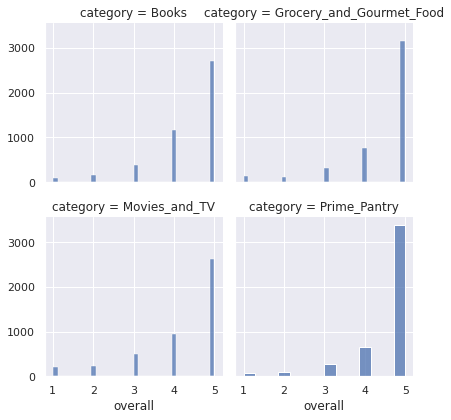

In [33]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.FacetGrid(keep_df, col="category", col_wrap=2)
g.map(sns.histplot, "overall")
#sns.histplot(data=keep_df, bins=[1,2,3,4,5], x="overall", hue="category", common_bins=True, )

In [24]:
label_dist = keep_df.groupby(["split", "category", "overall"]).count()["summary"]

split  category                  overall
0      Books                     1.0          53
                                 2.0          88
                                 3.0         216
                                 4.0         637
                                 5.0        1506
       Grocery_and_Gourmet_Food  1.0          78
                                 2.0          64
                                 3.0         170
                                 4.0         424
                                 5.0        1764
       Movies_and_TV             1.0         125
                                 2.0         126
                                 3.0         259
                                 4.0         543
                                 5.0        1447
       Prime_Pantry              1.0          44
                                 2.0          50
                                 3.0         159
                                 4.0         361
                            

In [66]:
perf_by_category = keep_df.groupby(["split"]).agg(lambda x: x.value_counts(normalize=True).iloc[0])["overall"]

In [67]:
perf_by_category

split
0    0.6603
1    0.6715
2    0.6465
Name: overall, dtype: float64